In [21]:
from tensorflow.keras.preprocessing import image#وارد کردن عکس به کد
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input


In [22]:
#تصویر را از گوگل درایو فراخوانی می کنیم. اینکار را می توان با آپ لود کردن عکس از سمت راست هم انجام داد
!gdown --id 1CoRZlZb5g1szxkAuy3WAk9hPkbIXtVoo/view?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1CoRZlZb5g1szxkAuy3WAk9hPkbIXtVoo/view?usp=drive_link

but Gdown can't. Please check connections and permissions.


<class 'PIL.Image.Image'>


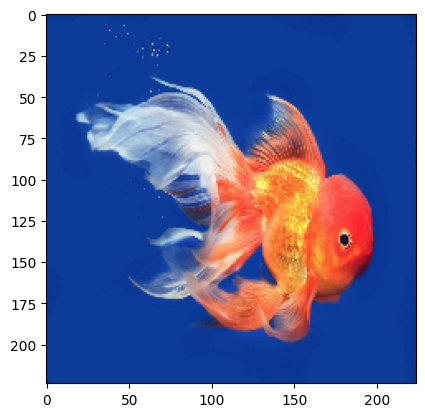

tensor of image_test : [[[  9.  53. 148.]
  [ 11.  55. 150.]
  [ 11.  55. 150.]
  ...
  [  9.  53. 148.]
  [  6.  50. 145.]
  [  6.  50. 145.]]

 [[  9.  53. 148.]
  [ 11.  55. 150.]
  [ 11.  55. 150.]
  ...
  [  9.  53. 148.]
  [  6.  50. 145.]
  [  6.  50. 145.]]

 [[ 11.  55. 150.]
  [ 11.  55. 150.]
  [ 11.  55. 150.]
  ...
  [  9.  53. 148.]
  [  9.  53. 148.]
  [  6.  50. 145.]]

 ...

 [[  8.  57. 150.]
  [  8.  57. 150.]
  [  8.  57. 150.]
  ...
  [ 11.  55. 150.]
  [  9.  53. 148.]
  [  6.  50. 145.]]

 [[  8.  57. 150.]
  [  8.  57. 150.]
  [  8.  57. 150.]
  ...
  [ 11.  55. 150.]
  [  9.  53. 148.]
  [  6.  50. 145.]]

 [[ 11.  55. 150.]
  [ 11.  55. 150.]
  [ 11.  55. 150.]
  ...
  [ 11.  55. 150.]
  [  9.  53. 148.]
  [  9.  53. 148.]]]


In [23]:
img_path="/content/Goldfish.jpg"
#فراخوانی عکس از کولب و تغییر اندازه آن به 244در244 با سه کانال
image_test=image.load_img(img_path,target_size=(224,224,3))
print(type(image_test))
#تبدیل عکس به صورت آرایه
image_test_to_tensor=image.img_to_array(image_test)

plt.imshow(image_test)#نمایش عکس

plt.show()
print("tensor of image_test :" ,image_test_to_tensor)#نمایش آرایه های عکس


In [24]:
#برای وارد کردن عکس به صورت بچ بچ نیاز است تا ما یک کانال دیگر به ابتدای عکس اضافه کنیم
#با کد زیر و انتخاب اکسس صفر تعداد ابعاد را به ابتدای عکس اضافه می کنیم
image_for_Bath_size=np.expand_dims(image_test_to_tensor, axis=0)
print("shape of image_test_to_tensor",image_test_to_tensor.shape)
print('shape of image_for_Bath_size is :',image_for_Bath_size.shape)

shape of image_test_to_tensor (224, 224, 3)
shape of image_for_Bath_size is : (1, 224, 224, 3)


In [25]:
#اکنون می خواهیم با یک مدل از پیش ساخته شده در کراس به نام وی جی جی 16 کار کنیم
#چون اطلاعی از پری پروسسینگ اتفاق افتاده در این پری ترین مدل را نمی دانیم همه
#پری پروسسینگ اتفاق افتاده را در این مدل با کد زیر می آوریم
#برای اطلاعات بیشتر لینک زیر را اجرا کنید
#https://keras.io/api/applications/
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
img=preprocess_input(image_for_Bath_size)
print(img.shape)
print(img)

(1, 224, 224, 3)
[[[[  44.060997  -63.779    -114.68    ]
   [  46.060997  -61.779    -112.68    ]
   [  46.060997  -61.779    -112.68    ]
   ...
   [  44.060997  -63.779    -114.68    ]
   [  41.060997  -66.779    -117.68    ]
   [  41.060997  -66.779    -117.68    ]]

  [[  44.060997  -63.779    -114.68    ]
   [  46.060997  -61.779    -112.68    ]
   [  46.060997  -61.779    -112.68    ]
   ...
   [  44.060997  -63.779    -114.68    ]
   [  41.060997  -66.779    -117.68    ]
   [  41.060997  -66.779    -117.68    ]]

  [[  46.060997  -61.779    -112.68    ]
   [  46.060997  -61.779    -112.68    ]
   [  46.060997  -61.779    -112.68    ]
   ...
   [  44.060997  -63.779    -114.68    ]
   [  44.060997  -63.779    -114.68    ]
   [  41.060997  -66.779    -117.68    ]]

  ...

  [[  46.060997  -59.779    -115.68    ]
   [  46.060997  -59.779    -115.68    ]
   [  46.060997  -59.779    -115.68    ]
   ...
   [  46.060997  -61.779    -112.68    ]
   [  44.060997  -63.779    -114.68    ]

In [26]:
model=VGG16(weights="imagenet")

In [27]:
#خلاصه ای از لایه ها و پارامتر های به وجود آمده در این مدل را می بینیم
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [28]:
#اکنون مدل را روی عکس امتحان می کنیم
pred_image_vgg16=model.predict(img)
#حاصل یک آرایه از اعداد حاصل از سافت مکس است که احتمال است و ما باید این پزرگترین احتمال را
# مشخص کنیم و ببینیم به کدام لیبل مربوط است . این کار را دی کد می نامند.
# با توجه به اینکه مدل وی جی جی رو ایمیج نت 1000کلاسه ترین شده پس تعداد این آرایه ها 1000تا می باشد
print(pred_image_vgg16)
print(pred_image_vgg16.shape)

1/1 [==============================] - 1s 760ms/step
[[1.81375963e-08 9.99689460e-01 1.64841241e-09 1.92606109e-09
  3.18255955e-09 3.26786704e-08 1.47876572e-10 1.05912512e-09
  2.76076995e-10 8.62302918e-15 3.80552621e-12 9.17793706e-12
  4.91273244e-10 1.97016475e-13 7.07295117e-12 9.54114773e-11
  2.73333287e-12 1.55865934e-13 6.71115588e-14 8.57455708e-13
  3.69799813e-14 2.92415640e-11 7.11664625e-12 6.72148838e-12
  1.84182910e-13 2.65215952e-12 5.45439471e-10 2.90611007e-10
  9.21297934e-12 1.65520831e-07 3.90372326e-12 3.01010467e-11
  1.05641251e-11 8.36952552e-09 2.68812250e-10 4.76998692e-12
  1.63234232e-10 3.35198937e-13 2.58126315e-11 1.42233244e-13
  1.73015346e-12 9.37372467e-13 3.30856328e-12 4.72040766e-12
  1.55463628e-13 5.30745322e-14 1.19025265e-12 2.80674724e-12
  2.03929348e-14 2.09110107e-14 3.30899072e-13 7.79030312e-11
  3.60715825e-13 2.41545309e-13 1.92760087e-13 4.98575031e-13
  3.17276892e-14 3.70348249e-14 2.37597962e-12 2.72566800e-13
  5.69901223e-13 

In [ ]:
#از اتریبیوت زیر برای اینکه یک عکس را با توجه به مدل ترین شده که در اینجا وی جی جی می باشد
#دی کد یا شناسایی میکنیم
from keras.applications.vgg16 import decode_predictions
# در اینجا با قرار دادن عدد 7 می توانیم 7تا پیشبینی را داشته باشیم که به صورت
# دیفالت روی 5 تا است .در جلوی هر کدام از پیشبینی ها احتمال مربوطه را نوشته است
#اصطلاحا تاپ 5 ارور گفته می شود یعنی در 5 تا پیشبینی قرار دارد
decode_predictions(pred_image_vgg16, top=7)


In [31]:
print("top 7 predicted image is :",decode_predictions(pred_image_vgg16, top=7))

top 7 predicted image is : [[('n01443537', 'goldfish', 0.99968946), ('n01910747', 'jellyfish', 0.00030874935), ('n02655020', 'puffer', 5.1230626e-07), ('n01950731', 'sea_slug', 2.1427914e-07), ('n01632777', 'axolotl', 1.6552083e-07), ('n09256479', 'coral_reef', 1.3974787e-07), ('n02607072', 'anemone_fish', 1.0748246e-07)]]


به عنوان  تمرین 1 با استفاده از حلقه فور کد را به صورت خلاصه بنویسید که چند تا عکس را به صورت همزمان بگیرد و تشخیص دهد

در تمرین 2 با ایجاد یک دیپلویمنت یک حالتی را به وجود آورید که عکس را بگیرد و تشخیص دهد که چیست
